In [241]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score

In [242]:
import sys 
sys.path.append("src")
import src.support as sp

In [243]:
pd.options.display.max_columns = None

df = pd.read_csv("datos/creditcardmarketing.csv", header= None)
col = ["Customer_Number","Offer_Accepted","Reward",
       "Mailer_Type","Income_Level","Bank_Accounts_Open",
       "Overdraft_Protection","Credit_Rating","Credit_Cards_Held",
       "Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1",
       "Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

df.columns = col
df.head(3)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


In [244]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Average_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Average_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Average_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


### 1. Gestión de nulos

Podemos observar que los nulos de nuestro df se encuentran en las columnas de Balance. Vamos a crear 3 copias de nuestro df para, utilizando la clase Gestion_nulos, ver que método de reemplazo desvía menos la media respecto al df inicial.

In [245]:
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Average_Balance_Q1      24
Average_Balance_Q2      24
Average_Balance_Q3      24
Average_Balance_Q4      24
Balance                 24
dtype: int64

In [246]:
df_pr1= df.copy()
df_pr2= df.copy()
df_pr3= df.copy()

In [247]:
# Gestión nulos simple imputer

lista_col = ['Average_Balance_Q1','Average_Balance_Q2','Average_Balance_Q3','Average_Balance_Q4', 'Balance']

sp.Gestion_nulos(df_pr1).simple_imputer_method(lista_col, 'median', np.nan)

Customer_Number       0.000000
Bank_Accounts_Open    0.000000
Credit_Cards_Held     0.000000
Homes_Owned           0.000000
Household_Size        0.000000
Average_Balance_Q1   -0.088646
Average_Balance_Q2    0.184601
Average_Balance_Q3   -0.043477
Average_Balance_Q4    0.128711
Balance               0.142914
Name: mean, dtype: float64

In [248]:
# Gestión nulos interative imputer

sp.Gestion_nulos(df_pr2).iterative_imputer_method()

Customer_Number       0.000000e+00
Bank_Accounts_Open    0.000000e+00
Credit_Cards_Held     0.000000e+00
Homes_Owned           0.000000e+00
Household_Size        0.000000e+00
Average_Balance_Q1   -3.410605e-13
Average_Balance_Q2    2.273737e-13
Average_Balance_Q3   -1.136868e-13
Average_Balance_Q4   -2.273737e-13
Balance              -4.547474e-13
Name: mean, dtype: float64

In [249]:
# Gestión nulos KNN imputer

sp.Gestion_nulos(df_pr3).knn_imputer_method(5)

Customer_Number       0.000000
Bank_Accounts_Open    0.000000
Credit_Cards_Held     0.000000
Homes_Owned           0.000000
Household_Size        0.000000
Average_Balance_Q1   -0.085751
Average_Balance_Q2   -0.090966
Average_Balance_Q3   -0.119999
Average_Balance_Q4   -0.083911
Balance              -0.048130
Name: mean, dtype: float64

El método de reemplazo de nulos que menos afecta a la media es el iterative imputer, por lo que lo aplicaremos a nuestro df.

In [250]:
sp.Gestion_nulos(df).iterative_imputer_method()

Customer_Number       0.000000e+00
Bank_Accounts_Open    0.000000e+00
Credit_Cards_Held     0.000000e+00
Homes_Owned           0.000000e+00
Household_Size        0.000000e+00
Average_Balance_Q1   -3.410605e-13
Average_Balance_Q2    2.273737e-13
Average_Balance_Q3   -1.136868e-13
Average_Balance_Q4   -2.273737e-13
Balance              -4.547474e-13
Name: mean, dtype: float64

In [251]:
df.isnull().sum()

Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Overdraft_Protection    0
Credit_Rating           0
Own_Your_Home           0
Customer_Number         0
Bank_Accounts_Open      0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Average_Balance_Q1      0
Average_Balance_Q2      0
Average_Balance_Q3      0
Average_Balance_Q4      0
Balance                 0
dtype: int64

### 2. Gestión de outliers

En average balance Q1 encontramos muchos outliers tanto a la alza como a la baja, asumimos que se trata de un momento en el que se dan numerosas regulaciones así como gastos e ingresos extraordinarios para particulares, por lo que no vamos a tratar esta columna. Si en el cálculo del outlier step aumentamos la cifra por la que multiplicamos el IQR y englobamos los grandes grupos de outliers (más cercanos a los bigotes) tanto a la alza como a la baja, podemos observar que los outliers restantes son aquellos que corresponden a rentas elevadas y que se corrigen al procesar el resto de las columnas de balance (en los decribe vemos como los máximos de balance pasan en todos los casos de +3k a un máx de 2.5k modificando tan sólo 10 valores)

In [252]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
Average_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
Average_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
Average_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
Average_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [253]:
column_list=["Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

sp.Gestion_outliers(df).detectar_outliers_index(column_list)

{'Average_Balance_Q2': [12635],
 'Average_Balance_Q3': [2296, 8887, 10576, 12635, 15259],
 'Average_Balance_Q4': [2296, 8887, 10576, 12635, 14003, 15608],
 'Balance': [2296, 2655, 8777, 12633, 15608]}

In [254]:
column_list=["Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]

df_sin_outliers= sp.Gestion_outliers(df).eliminar_outliers(column_list)

In [255]:
df_sin_outliers.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,17990.0,8999.758810,5196.553289,1.00,4500.25,8999.50,13499.75,18000.0
Bank_Accounts_Open,17990.0,1.255809,0.472418,1.00,1.00,1.00,1.00,3.0
Credit_Cards_Held,17990.0,1.903558,0.797031,1.00,1.00,2.00,2.00,4.0
Homes_Owned,17990.0,1.203446,0.427356,1.00,1.00,1.00,1.00,3.0
Household_Size,17990.0,3.499444,1.114030,1.00,3.00,3.00,4.00,9.0
Average_Balance_Q1,17990.0,939.688487,348.159089,48.25,787.75,1006.25,1152.50,2430.0
Average_Balance_Q2,17990.0,909.820168,618.954016,0.00,393.00,773.00,1520.00,2435.0
Average_Balance_Q3,17990.0,998.663002,455.640240,0.00,663.25,1031.00,1341.00,2234.0
Average_Balance_Q4,17990.0,1041.206437,551.868613,0.00,633.00,946.00,1461.00,2576.0
Balance,17990.0,809.064339,556.540495,0.00,363.00,703.00,1210.00,2475.0


### 3. Encoding

In [256]:
df.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


#### Variables sin orden:

Vamos a considerar variables sin orden por tener diferencias mínimas: Reward, Mailer_Type y Credit_Rating

In [257]:
df = sp.Encoding(df).dummies_encoding( ["Reward", "Mailer_Type","Credit_Rating"])

In [258]:
df_sin_outliers = sp.Encoding(df_sin_outliers).dummies_encoding( ["Reward", "Mailer_Type","Credit_Rating"])

#### Variables con orden:

Las variables no encodeadas anteriormente son aquellas con orden. Definiremos el orden apoyándonos en el EDA y en los siguientes datos:

In [259]:
df.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Own_Your_Home,18000,2,Yes,11655


In [260]:
sp.Encoding(df).porcentajes_variables_nonum( ["Offer_Accepted", "Income_Level","Overdraft_Protection","Own_Your_Home" ])

% valores columna: Offer_Accepted
No     94.32
Yes     5.68
Name: Offer_Accepted, dtype: float64
 
% valores columna: Income_Level
Medium    50.07
High      25.14
Low       24.78
Name: Income_Level, dtype: float64
 
% valores columna: Overdraft_Protection
No     85.12
Yes    14.88
Name: Overdraft_Protection, dtype: float64
 
% valores columna: Own_Your_Home
Yes    64.75
No     35.25
Name: Own_Your_Home, dtype: float64
 


#### DF:

In [261]:
# Offer_Accepted
orden = ['No', 'Yes']

df = sp.Encoding(df).ordinal_encoder( "Offer_Accepted", orden)

In [262]:
# Income_Level
orden = ['Medium', 'High', "Low"]

df = sp.Encoding(df).ordinal_encoder( "Income_Level", orden)

In [263]:
# Overdraft_Protection
orden = ['No', 'Yes']

df = sp.Encoding(df).ordinal_encoder( "Overdraft_Protection", orden)

In [264]:
# Own_Your_Home
orden = ['Yes', 'No']

df = sp.Encoding(df).ordinal_encoder( "Own_Your_Home", orden)

In [265]:
df = df.drop(['Offer_Accepted', 'Income_Level', 'Overdraft_Protection','Own_Your_Home'], axis=1)


#### DF SIN OUTLIERS

No me ha dado tiempo a hacer todas las pruebas con los 2 df, más adelante pruebo con df sin outliers y comparo. Para esta entrega seleccionaré df, ya que sólo había eliminado 10 valores del conjunto total.

### 4. Estandarización

In [266]:
df_est= df.copy()

In [267]:
columnas_num= ['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4', 'Balance']

robust = RobustScaler()
robust.fit(df[columnas_num])
X_robust = robust.transform(df[columnas_num])
df_est[columnas_num] = X_robust


In [268]:
df_est.head()

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_oe,Income_Level_oe,Overdraft_Protection_oe,Own_Your_Home_oe
0,1.0,1.0,2.0,1.0,4.0,0.423037,0.794855,-0.228614,0.179735,0.351726,1,0,0,1,0,1,0,0,0,1,0,1
1,2.0,1.0,2.0,2.0,5.0,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938,1,0,0,1,0,0,0,1,0,0,0,0
2,3.0,2.0,2.0,1.0,2.0,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294,1,0,0,0,1,0,0,1,0,1,0,0
3,4.0,2.0,1.0,1.0,4.0,0.582791,0.714127,1.073746,0.208685,-0.336382,1,0,0,1,0,1,0,0,0,0,0,1
4,5.0,1.0,2.0,1.0,6.0,0.560850,1.212686,0.479351,0.043426,-0.400118,1,0,0,1,0,0,0,1,0,0,0,0


### 5. Balanceo de variables

Como hemos visto en el EDA, existe un gran desbalanceo en nuestra variable respuesta. En este caso vamos a utilizar el método upsampling para corregir el desajuste.

In [269]:
X = df_est.drop("Offer_Accepted_oe", axis=1)
y = df_est["Offer_Accepted_oe"]

In [270]:
upp = RandomOverSampler()
X_upp, y_upp = upp.fit_resample(X, y)
y_upp.value_counts()

0    16977
1    16977
Name: Offer_Accepted_oe, dtype: int64

In [271]:
df_upsampled = pd.concat([X_upp, y_upp], axis = 1)

In [272]:
df_upsampled["Offer_Accepted_oe"].value_counts()

0    16977
1    16977
Name: Offer_Accepted_oe, dtype: int64

### 6. Ajuste de modelo

In [273]:
X = df_upsampled.drop('Offer_Accepted_oe', axis =1)
y = df_upsampled['Offer_Accepted_oe']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

#### Regresión logística

In [274]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [275]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [276]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (7, 5))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

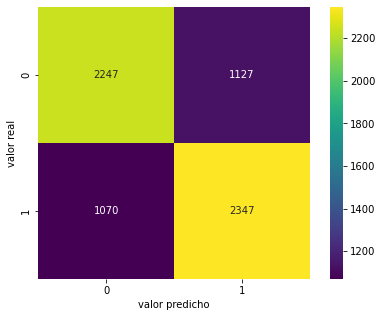

In [277]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [278]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [279]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.676484,0.675590,0.686860,0.681178,0.352872,test,Regresión logistica
1,0.670949,0.664134,0.689602,0.676628,0.341937,train,Regresión logistica


Lo que más llama la atención de este resultado es que tiene un kappa muy bajo, lo que quiere decir que nuesto modelo es muy probablemente que esté acertando por puro azar.

#### Decision Tree Classifier

In [280]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [281]:
max_features = np.sqrt(len(X_train.columns))
max_features

4.58257569495584

In [282]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [283]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.964512,0.934117,1.0,0.965936,0.928989,test,Decission Tree I
1,1.000000,1.000000,1.0,1.000000,1.000000,train,Decission Tree I


Los valores de este árbol indican con gran probabilidad overfitting.

In [284]:
print(arbol.tree_.max_depth)

38


In [ ]:
depht_list=list(range(1,39))

param = {"max_depth": depht_list,
        "min_samples_split": [50,100,150,200],
        "min_samples_leaf": [25,50,75,100,125,150],
        "max_features": [1,2,3,4,5]}

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [75, 100, 125, 150, 175, 200, 225,
                                              250, 275],
                         'min_samples_split': [100, 150, 200, 250, 300, 350]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=22, max_features=5, min_samples_leaf=75,
                       min_samples_split=100)

In [ ]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [ ]:
results_decission_tree2 = metricas(y_test, y_pred_test_dt2,y_train, y_pred_train_dt2, "Decission Tree II" )
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.746135,0.719927,0.810945,0.762731,0.491839,test,Decission Tree II
1,0.759010,0.730179,0.820428,0.772677,0.518114,train,Decission Tree II


### Random Forest

In [293]:
bosque = GridSearchCV(
            estimator=RandomForestClassifier(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [ ]:
bosque.fit(X_train, y_train)

en este punto se queda pillado el código y no funciona

In [ ]:
bosque.best_params_